# FastText Training - Bloom's Taxonomy Classifier

Train Semantic-FastText model for educational question classification.

In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
from preprocessing import load_and_preprocess_data, load_config
from fasttext_classifier import SemanticFastText, train_fasttext_model
from evaluate import ModelEvaluator

In [2]:
# Load configuration
config = load_config('../config/config.yaml')

# Load and preprocess data
train_df, val_df, test_df, label_to_id, id_to_label = load_and_preprocess_data(
    '../data/raw/bloom_questions.csv',
    text_column='question',
    label_column='level',
    config_path='../config/config.yaml'
)

print(f"Classes: {list(label_to_id.keys())}")

Loaded 120 samples
After preprocessing: 120 samples
Train: 84, Val: 18, Test: 18
Classes: ['Analyze', 'Apply', 'Create', 'Evaluate', 'Remember', 'Understand']


In [3]:
# Train FastText model
model = train_fasttext_model(
    train_df,
    val_df,
    label_to_id,
    config,
    save_dir='../models/fasttext'
)

Training FastText embeddings on 102 sentences...
Vocabulary size: 337


Generating embeddings: 100%|██████████| 84/84 [00:00<00:00, 27728.75it/s]

Training SVM classifier...
Classifier training complete!


Model saved to ../models/fasttext


In [4]:
# Evaluate on test set
labels = ["Remember", "Understand", "Apply", "Analyze", "Evaluate", "Create"]
evaluator = ModelEvaluator(labels)

X_test = model.get_embeddings(test_df['clean_text'].tolist())
y_true = test_df['label_id'].values
y_pred = model.classifier.predict(X_test)

metrics = evaluator.evaluate(y_true, y_pred, 'Semantic-FastText')
evaluator.print_results('Semantic-FastText')

Generating embeddings: 100%|██████████| 18/18 [00:00<00:00, 4171.59it/s]


Results for Semantic-FastText

Overall Metrics:
  Accuracy:           0.0556
  Precision (weighted): 0.0119
  Recall (weighted):    0.0556
  F1-Score (weighted):  0.0196
  F1-Score (macro):     0.0196

Classification Report:

              precision    recall  f1-score   support

    Remember       0.00      0.00      0.00         3
  Understand       0.00      0.00      0.00         3
       Apply       0.00      0.00      0.00         3
     Analyze       0.00      0.00      0.00         3
    Evaluate       0.07      0.33      0.12         3
      Create       0.00      0.00      0.00         3

    accuracy                           0.06        18
   macro avg       0.01      0.06      0.02        18
weighted avg       0.01      0.06      0.02        18



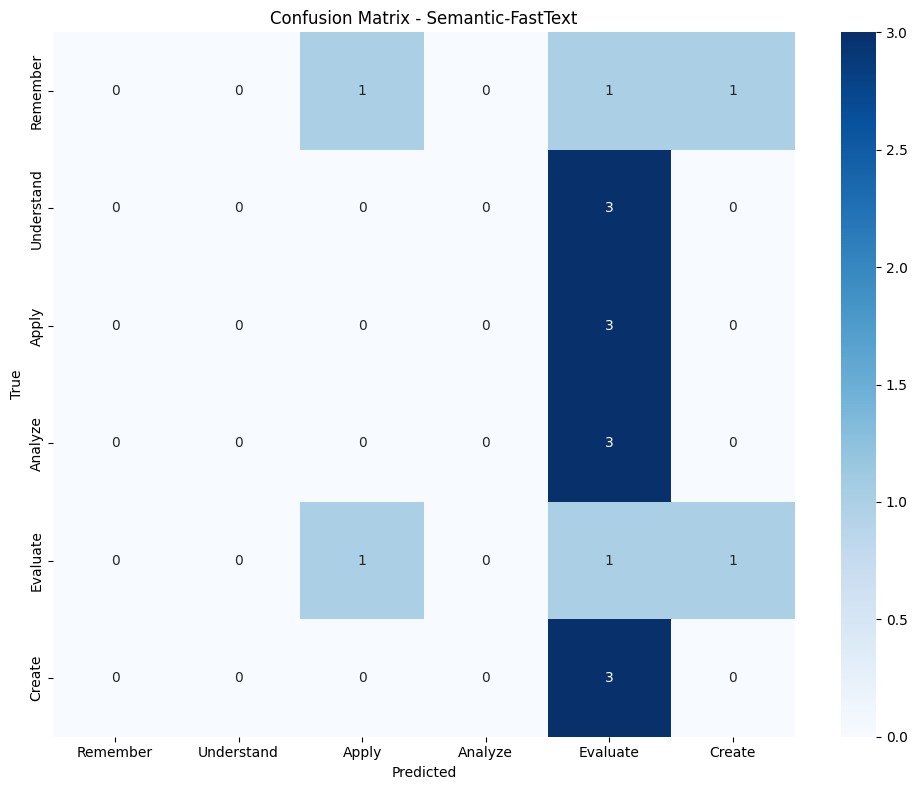

In [5]:
# Plot confusion matrix
evaluator.plot_confusion_matrix('Semantic-FastText', figsize=(10, 8))

In [6]:
# Test predictions
test_questions = [
    "What is the capital of France?",
    "Explain how photosynthesis works.",
    "Calculate the area of a circle.",
    "Compare democracy and monarchy.",
    "Evaluate the effectiveness of vaccines.",
    "Design an experiment to test gravity."
]

for q in test_questions:
    result = model.predict_single(q.lower())
    print(f"[{result['level']:12}] ({result['confidence']:.0%}) {q}")

Generating embeddings: 100%|██████████| 1/1 [00:00<?, ?it/s]


[Remember    ] (19%) What is the capital of France?


Generating embeddings: 100%|██████████| 1/1 [00:00<?, ?it/s]


[Remember    ] (19%) Explain how photosynthesis works.


Generating embeddings: 100%|██████████| 1/1 [00:00<00:00, 976.33it/s]


[Remember    ] (21%) Calculate the area of a circle.


Generating embeddings: 100%|██████████| 1/1 [00:00<?, ?it/s]


[Remember    ] (20%) Compare democracy and monarchy.


Generating embeddings: 100%|██████████| 1/1 [00:00<00:00, 989.92it/s]


[Remember    ] (18%) Evaluate the effectiveness of vaccines.


Generating embeddings: 100%|██████████| 1/1 [00:00<?, ?it/s]

[Remember    ] (18%) Design an experiment to test gravity.
